In [1]:
import numpy as np
import pandas as pd
import os
print(os.listdir(r"C:\Users\shubh\OneDrive\Desktop\rice_plant_lacks_nutrients"))

['Nitrogen(N)', 'Phosphorus(P)', 'Potassium(K)']


In [2]:
pip install OpenCV-python

Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate in certificate chain (_ssl.c:1129)'))) - skipping
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2

In [4]:
pip install python-resize-image

Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate in certificate chain (_ssl.c:1129)'))) - skipping
Note: you may need to restart the kernel to use updated packages.


In [5]:
from resizeimage import resizeimage
from PIL import Image
images=[]
labels=[]
def load_images_from_folder_a(folder,id):
    
    for filename in os.listdir(folder):
        if filename!="Thumbs.db":
            img1 = Image.open(os.path.join(folder,filename))
            new1 = resizeimage.resize_contain(img1, [128, 128, 3])
            new1 = np.array(new1, dtype='uint8')
            images.append(new1)
            if id==1:
                labels.append(0)
            elif id==2:
                labels.append(1)
            else:
                labels.append(2)

In [6]:
load_images_from_folder_a(r"C:\Users\shubh\OneDrive\Desktop\rice_plant_lacks_nutrients\Nitrogen(N)",1)
load_images_from_folder_a(r"C:\Users\shubh\OneDrive\Desktop\rice_plant_lacks_nutrients\Phosphorus(P)",2)
load_images_from_folder_a(r"C:\Users\shubh\OneDrive\Desktop\rice_plant_lacks_nutrients\Potassium(K)",3)


train = np.array(images)
label=labels
train = train.astype('float32') / 255

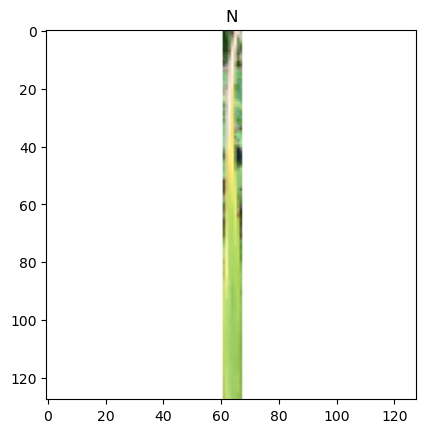

In [7]:
if label[1]==0:
    plt.title("N")
    plt.imshow(train[1])
elif label[1]==1:
    plt.title("P")
    plt.imshow(train[1])
else:
    plt.title("K")
    plt.imshow(train[1])
    

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(train,label,test_size=0.1,random_state=1)

In [9]:
import keras
from keras import Sequential, utils
from tensorflow.keras.utils import to_categorical
print(len(X_train),len(X_test))
print(len(Y_train),len(Y_test))
print(X_train[10].shape)
num_classes=3
#Doing One hot encoding as classifier has multiple classes
Y_train_cat=to_categorical(Y_train,num_classes)
Y_test_cat=to_categorical(Y_test,num_classes)

1040 116
1040 116
(128, 128, 4)


In [10]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout
from keras import regularizers
from keras.regularizers import l1_l2, l2
from keras import activations
from keras import initializers 
from keras.layers import LeakyReLU, BatchNormalization
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 4), kernel_regularizer=regularizers.l2(0.01)))
#model.add(Conv2D(32, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.01)))
#model.add(Conv2D(32, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.01))) # Newly added
#model.add(Conv2D(32, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D((2, 2), padding='same')) # Newly added
model.add(Conv2D(32, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.01))) # Newly added
#model.add(Conv2D(32, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D((2, 2), padding='same')) # Newly added
model.add(Conv2D(32, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.01))) # Newly added
#model.add(Conv2D(32, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D((2, 2), padding='same')) # Newly added

model.add(Dropout(0.25)) # Dropout layer added
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.25)) #Dropout Layer added
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()
opt = keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
#opt = keras.optimizers.SGD(learning_rate=0.001, momentum=0.1, nesterov=False) # BAD 
#opt = keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy', #binary_crossentropy
              optimizer=opt,
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      1184      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0

In [ ]:
hist=model.fit(X_train,Y_train_cat, epochs=100, batch_size=16, verbose=1  ,validation_split=0.1)

Epoch 1/100
59/59 [==============================] - 9s 140ms/step - loss: 2.3563 - accuracy: 0.4081 - val_loss: 2.2315 - val_accuracy: 0.5481
Epoch 2/100
59/59 [==============================] - 8s 144ms/step - loss: 2.1241 - accuracy: 0.5406 - val_loss: 1.9880 - val_accuracy: 0.5673
Epoch 3/100
59/59 [==============================] - 9s 144ms/step - loss: 1.8940 - accuracy: 0.5951 - val_loss: 1.8580 - val_accuracy: 0.6250
Epoch 4/100
59/59 [==============================] - 9s 157ms/step - loss: 1.7569 - accuracy: 0.6357 - val_loss: 1.6612 - val_accuracy: 0.6827
Epoch 5/100
59/59 [==============================] - 8s 139ms/step - loss: 1.6348 - accuracy: 0.6613 - val_loss: 1.5766 - val_accuracy: 0.6635
Epoch 6/100
40/59 [===================>..........] - ETA: 2s - loss: 1.5859 - accuracy: 0.6609

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
accuracy = model.evaluate(X_test, Y_test_cat, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy[1])
Y_predict=model.predict(X_test)
#print(Y_test)
#print(Y_predict)
from numpy import argmax
Y_predict_1=argmax(Y_predict, axis=1, out=None)
#print(Y_predict_1)
#from pandas_ml import ConfusionMatrix 
#cm = ConfusionMatrix(Y_test, Y_predict_1) 
#cm.plot(backend='seaborn')
#cm.print_stats()
#print("Binary confusion matrix:\n%s" % cm)

In [ ]:
Y_predict=model.predict(X_test)
from numpy import argmax
Y_predict_1=argmax(Y_predict, axis=1, out=None)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(Y_test,Y_predict_1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['N','P','K'])
disp.plot()

In [ ]:
 print('Formula based Accuracy:',sum(np.diag(cm))/sum(cm.sum(axis=1)))


In [ ]:
FP = cm.sum(axis=0) - np.diag(cm) 
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# F1 Score
F1=2*((PPV*TPR)/(PPV+TPR))
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

In [ ]:
from sklearn import metrics
print('TP:', TP)
print('TN:', TN)
print('FP:', FP)
print('FN:', FN)
#Accuracy
print("Accuracy : ")
print(round(metrics.accuracy_score(Y_test,Y_predict_1)*100,2))

#TPR - sensitivity
print("\nSensitivity : ")
print(" Classwise Sensitivity:", np.round(TPR*100,2))

print(" Overall Sensitivity:", round((sum(TPR)/len(TPR))*100,2))

#TNR - specificity
print("\nSpecificity : ")
print(" Classwise Specificity :", np.round(TNR*100,2))
print(" Overall Specificity :", round((sum(TNR)/len(TNR))*100,2))

#Precision
print("\nPrecision : ")
print(" Classwise Precision :", np.round(PPV*100,2))
print(" Overall Specificity :", round((sum(PPV)/len(PPV))*100,2))

#F1
print("\nF1 : ")
print(" Classwise F1 Score :", np.round(F1*100,2))
print(" Overall F1 Score :", round((sum(F1)/len(F1))*100,2))



In [ ]:
model_json = model.to_json()
with open("CNN.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("CNN.h5")